In [42]:
import pandas as pd
import numpy as np
from sklearn import linear_model, model_selection, metrics, ensemble, mixture
import random
from decimal import Decimal
import math as m
import matplotlib.pyplot as plt
from scipy import stats, sparse
import itertools as it

PROBLEM 1

In [43]:
scores = pd.read_csv("hw4-data/CFB2019_scores.csv", header = None)

names_file = open("hw4-data/TeamNames.txt", "r", encoding = 'utf-8-sig')
names = names_file.read()
names = names.split("\n")
names.pop() #GETTING WEIRD '' AS FINAL VALUE
names_file.close()

In [44]:
#MAKE DICT FOR MORE EFFICIENT VALUE ACCESS
score_dict = {}
for i in range(len(scores)):
    row_dict = {}
    row_dict['team_1'] = scores.loc[i, 0]
    row_dict['score_1'] = scores.loc[i, 1]
    row_dict['team_2'] = scores.loc[i, 2]
    row_dict['score_2'] = scores.loc[i, 3]
    score_dict[i] = row_dict

In [45]:
rwm = [[0 for i in range(769)] for j in range(769)]

In [46]:
for i in range(len(score_dict)):
    t_1 = score_dict[i]['team_1'] - 1 #-1 CUZ OF 0 INDEX UGH
    t_2 = score_dict[i]['team_2'] - 1 #-1 CUZ OF 0 INDEX UGH
    s_1 = score_dict[i]['score_1'] 
    s_2 = score_dict[i]['score_2'] 
    if s_1 > s_2:
        #M_ii
        rwm[t_1][t_1] += (1 + s_1/(s_1 + s_2))
        #M_jj
        rwm[t_2][t_2] += (s_2/(s_1 + s_2))
        #M_ij
        rwm[t_1][t_2] += (s_1/(s_1 + s_2))
        #M_ji
        rwm[t_2][t_1] += (1 + s_2/(s_1 + s_2))
    else:
        #M_ii
        rwm[t_1][t_1] += (s_1/(s_1 + s_2))
        #M_jj
        rwm[t_2][t_2] += (1 + s_2/(s_1 + s_2))
        #M_ij
        rwm[t_1][t_2] += (1 + s_1/(s_1 + s_2))
        #M_ji
        rwm[t_2][t_1] += (s_2/(s_1 + s_2))

In [47]:
denoms = list(map(sum, rwm))

In [48]:
for i in range(len(rwm)):
    for j in range(len(rwm)):
        rwm[i][j] = rwm[i][j]/denoms[i]

In [49]:
#CONVERT RWM TO ARRAYS FOR LINALG STUFF
rwm = [np.array(item) for item in rwm]
rwm = np.array(rwm)

In [50]:
#INITIALIZE W_t AS W_0 = UNIFORM DISTRIBUTION
w_t = np.array([1/769 for i in range(769)]).reshape(1, 769)



In [51]:
def get_scores(array, matrix, t):
    
    with_index = []
    w = array.copy()
    
    #GET DESIRED LIST OF SCORES
    for i in range(t):
        w = np.matmul(w, matrix)
    
    #ALSO NEED TEAM INDEX
    for j in range(len(w[0])):
            with_index.append([j + 1, w[0][j]])
    
    with_index.sort(key = lambda x: x[1], reverse = True) 
    
    return with_index

In [52]:
ten = get_scores(w_t, rwm, 10)
hunned = get_scores(w_t, rwm, 100)
thou = get_scores(w_t, rwm, 1000)
ten_thou = get_scores(w_t, rwm, 10000)

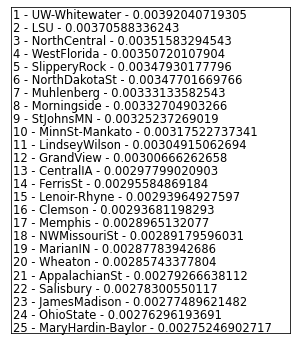

In [53]:
fig = plt.figure()
ax = plt.gca()
fig.set_figwidth(5)
fig.set_figheight(6)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
for i in range(25):
    plt.text(0.01, 0.965 - i/25,\
             str(i+1) + \
             ' - ' + \
             names[ten[i][0] - 1] + \
             ' - ' + \
             str(round(ten[i][1], 14)), \
             size = 11.5)
# plt.savefig("ten_rankings")

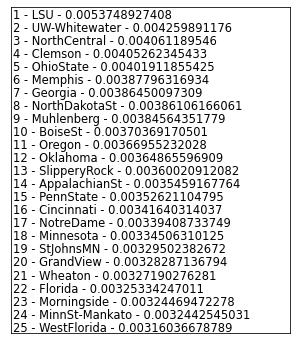

In [54]:
fig = plt.figure()
ax = plt.gca()
fig.set_figwidth(5)
fig.set_figheight(6)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
for i in range(25):
    plt.text(0.01, 0.965 - i/25,\
             str(i+1) + \
             ' - ' + \
             names[hunned[i][0] - 1] + \
             ' - ' + \
             str(round(hunned[i][1], 14)), \
             size = 11.5)
# plt.savefig("hundo_rankings")

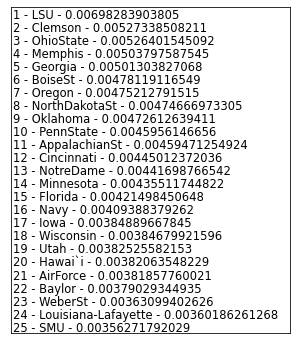

In [55]:
fig = plt.figure()
ax = plt.gca()
fig.set_figwidth(5)
fig.set_figheight(6)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
for i in range(25):
    plt.text(0.01, 0.965 - i/25,\
             str(i+1) + \
             ' - ' + \
             names[thou[i][0] - 1] + \
             ' - ' + \
             str(round(thou[i][1], 14)), \
             size = 11.5)
# plt.savefig("thou_rankings")

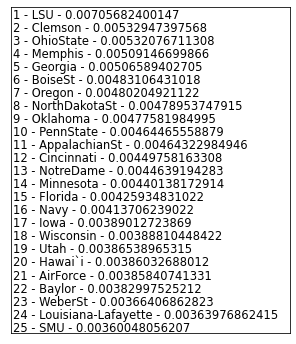

In [56]:
fig = plt.figure()
ax = plt.gca()
fig.set_figwidth(5)
fig.set_figheight(6)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
for i in range(25):
    plt.text(0.01, 0.965 - i/25,\
             str(i+1) + \
             ' - ' + \
             names[ten_thou[i][0] - 1] + \
             ' - ' + \
             str(round(ten_thou[i][1], 14)), \
             size = 11.5)
# plt.savefig("ten_thou_rankings")

In [57]:
vals, vector = sparse.linalg.eigs(rwm, 1)
# vector = sparse.linalg.eigs(rwm, 1)[1]
vector = vector.reshape(1, 769)

to_plot = {}
w = w_t.copy()

for t in range(10000):
    w = np.matmul(w, rwm)
    to_norm = w - vector
    to_plot[t + 1] = np.linalg.norm(to_norm)

Text(0.5, 0, 't')

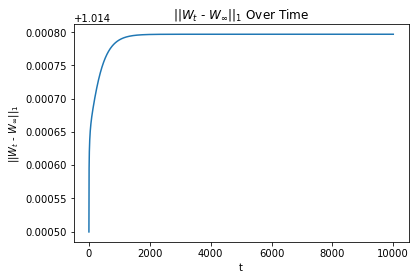

In [58]:
plt.plot(list(to_plot.keys()), list(to_plot.values()))
plt.title('||$W_t$ - $W_\infty$||$_1$ Over Time' )    
plt.ylabel('||$W_t$ - $W_\infty$||$_1$')
plt.xlabel('t')
# plt.savefig("p1_norm_plot")

PROBLEM 2

In [59]:
vocab_data_file = open("hw4-data/nyt_data.txt", "r", encoding = 'utf-8-sig')
vocab_data = vocab_data_file.read()
vocab_data = vocab_data.split("\n")
vocab_data.pop() #GETTING WEIRD '' AS FINAL VALUE
vocab_data_file.close()


In [60]:
#INITIALIZE WORDS BY DOC MATRIX
wbd = [[0 for i in range(8447)] for j in range(3012)]

In [61]:
#INPUT VALS TO MAKE "X"
for i in range(len(vocab_data)):
    doc = vocab_data[i]
    doc = doc.split(",")
    for j in range(len(doc)):
        word_obs = doc[j]
        word_obs = word_obs.split(":")
        word_obs  = [int(x) for x in word_obs]
        wbd[word_obs[0] - 1][i] = word_obs[1]

In [62]:
#MAKE W, H MATRICES
w = [[random.choice([1, 2]) for i in range(25)] for j in range(3012)]
h = [[random.choice([1, 2]) for i in range(8447)] for j in range(25)]

In [63]:
wh = np.matmul(w, h)

In [64]:
def h_update(x, w, h, wh, k, j, i_size):
    
    first_sum = []
    second_sum = []
    
    for i in range(i_size):
        w_ik = w[i][k]
        x_ij = x[i][j]
        wh_ij = wh[i][j]
        
        first_sum_val = (w_ik * x_ij)/(wh_ij + (10 ** -16) )
        
        first_sum.append(first_sum_val)
        second_sum.append(w_ik)
    
    final_output = (sum(first_sum) + (10 ** -16))/(sum(second_sum) + (10 ** -16))
    return final_output

In [65]:
def w_update(x, w, h, wh, k, i, j_size):
    
    first_sum = []
    second_sum = []
    
    for j in range(j_size):
        h_kj = h[k][j]
        x_ij = x[i][j]
        wh_ij = wh[i][j]
        
        first_sum_val = (h_kj * x_ij)/(wh_ij + (10 ** -16) )
        
        first_sum.append(first_sum_val)
        second_sum.append(h_kj)
    
    final_output = ( sum(first_sum) + (10 ** -16) )/( sum(second_sum) + (10** -16) )
    return final_output

In [66]:
def divergence_obj(x, wh, i_size, j_size):
    
    to_sum = []
    
    for i in range(i_size):
        for j in range(j_size):
            x_ij = x[i][j]
            wh_ij = wh[i][j]
            ln_wh_ij = np.log(wh_ij + (10 ** -16))
            val = x_ij * ln_wh_ij - wh_ij
            
            to_sum.append(val)
    
    final_output = -1 * sum(to_sum)
    return final_output

In [67]:
performance = {}

for iteration in range(100):
    
    
    for j in range(len(h[0])):
        for k in range(25):
            h[k][j] *= h_update(wbd, w, h, wh, k, j, 25)


    print("h update done")
    
    for i in range(len(w)):
        for k in range(25):
            w[i][k] += w_update(wbd, w, h, wh, k, i, 25)

    print("w update done")

    wh = np.matmul(w, h)
    
    perf = divergence_obj(wbd, wh, len(w), len(h))
    
    print(iteration + 1, perf)
    
    performance[iteration + 1] = perf

h update done
w update done
1 31725.892161667467
h update done
w update done
2 33200.40863190947
h update done
w update done
3 24244.80919816478
h update done
w update done
4 22247.52511106803
h update done
w update done
5 20300.499356129887
h update done
w update done
6 19033.245914244515
h update done
w update done
7 18036.772573582963
h update done
w update done
8 17224.869211297984
h update done
w update done
9 16529.217409034096
h update done
w update done
10 15915.90103634005
h update done
w update done
11 15366.1726545037
h update done
w update done
12 14868.121763381885
h update done
w update done
13 14412.810908793983
h update done
w update done
14 13993.524115008635
h update done
w update done
15 13605.497099431901
h update done
w update done
16 13245.373798823404
h update done
w update done
17 12910.616800504069
h update done
w update done
18 12599.096066540356
h update done
w update done
19 12308.87945495296
h update done
w update done
20 12038.162025020474
h update done
w 

Text(0, 0.5, 'D(X||WH)')

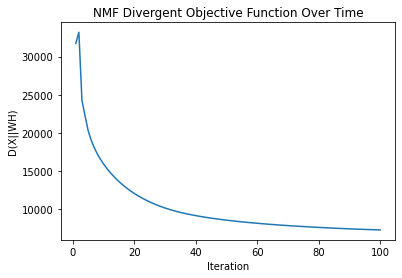

In [68]:
plt.plot(list(performance.keys()), list(performance.values()))
plt.title("NMF Divergent Objective Function Over Time")
plt.xlabel("Iteration")
plt.ylabel("D(X||WH)")
# plt.savefig("nmf_perf")

B)

In [69]:
vocab_words_file = open("hw4-data/nyt_vocab.dat", "r", encoding = 'utf-8-sig')
vocab_words = vocab_words_file.read()
vocab_words = vocab_words.split("\n")
vocab_words.pop() #GETTING WEIRD '' AS FINAL VALUE
vocab_words_file.close()

In [70]:
denoms = list(map(sum, list(zip(*w))))

for i in range(len(w)):
    for j in range(len(w[0])):
        w[i][j] /= denoms[j]

In [71]:
cols_grouped = list(zip(*w))

sorted_groups = []

for group in cols_grouped:
    group = list(group)
    group = list(enumerate(group))
    group.sort(key = lambda x: x[1], reverse = True) 
    sorted_groups.append(group)

# sorted_groups

In [72]:
vocab_words_file = open("hw4-data/nyt_vocab.dat", "r", encoding = 'utf-8-sig')
vocab_words = vocab_words_file.read()
vocab_words = vocab_words.split("\n")
vocab_words.pop() #GETTING WEIRD '' AS FINAL VALUE
vocab_words_file.close()

In [73]:
wordlist = []

word_limit = sorted_groups.copy()

for i in range(len(word_limit)):
    word_limit[i] = list(it.islice(word_limit[i], 10))
    word_list = [vocab_words[item[0]] for item in word_limit[i]]
    wordlist.append(word_list)

wordlist = [np.array(item) for item in wordlist]
wordlist = np.array(wordlist)


# wordlist

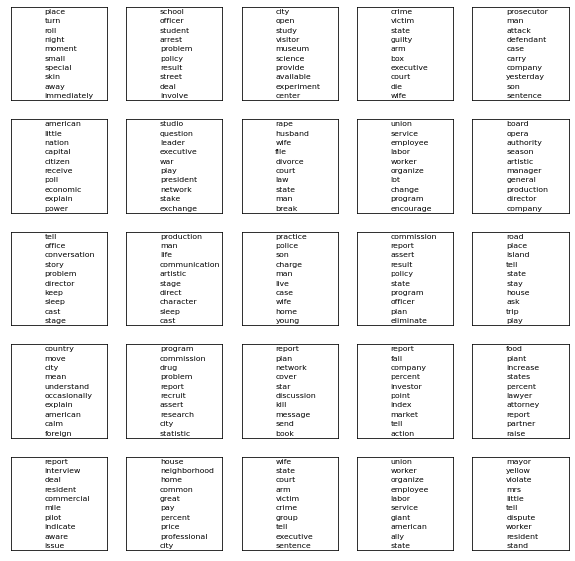

In [74]:
fig, axes = plt.subplots(5,5)
fig.set_figwidth(10)
fig.set_figheight(10)
for x in range(5):
    for y in range(5):
        axes[x, y].yaxis.set_visible(False)
        axes[x, y].xaxis.set_visible(False)
        for i in range(len(wordlist[0])):
            axes[x, y].text(0.35, 0.93 - i/10, wordlist[5*x + y][i], size = 7.8)
# fig.savefig("larry")